# PROJETO - Se liga na música!

# Introdução

Neste projeto, vamos comparar as preferências musicais dos habitantes de Springfild e Shelbyville. Iremos estudar os dados de um serviço de streaming de música online para testar a hipótese apresentada abaixo e comparar o comportamento dos usuários dessas duas cidades.

``Hipótese``: A atividade dos usuários é diferente dependendo do dia da semana e da cidade.

## Dicionário de dados

Há um DataFrame que iremos trabalhar:

- `music_project_en` (dados sobre preferências musicais de usuários em duas cidades):
    - `'userID'`: identifica cada usuário univocamente
    - `'Track'`: título da música
    - `'artist'`: nome do artista
    - `'genre'`: gênero da música
    - `'City'`: cidade do usuário
    - `'time'`: a hora do dia em que uma música foi tocada (HH:MM:SS)
    - `'Day'`: dia da semana

## Importando as Bibliotecas <a id='data_review'></a>



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Etapa 1. Carregando os dados:

In [2]:
df = pd.read_csv('music_project_en.csv')

**Imprimindo as primeiras ``10 linhas`` da tabela:**

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


**Exibindo ``informações gerais`` sobre o DataFrame:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## Etapa 2. Preparação de dados

In [5]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

**Colocando aos títulos das colunas em letras ``minúsculas`` e removendo ``os espaços vazios``:**

In [6]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

**Renomeando a coluna ``user_id``:**

In [7]:
df = df.rename(columns = {'userid': 'user_id'})
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

**Verificando os ``dados ausentes`` no DataFrame:**

In [8]:
df.isna().sum()

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64

**Substituindo os valores ausentes nas colunas `track`, `artist` e `genre` pela string `unknown`:**

In [9]:
columns_to_replace = ['track', 'artist', 'genre']
for col in columns_to_replace:
    df[col].fillna('unknown', inplace=True)
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

**Verificando os ``dados duplicados`` no DataFrame:**

In [10]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

**Verificando a quantidade de ``gêneros`` únicos no Dataframe:**


In [11]:
df['genre'].nunique()

269

**Verificando os ``gêneros`` únicos no Dataframe:**


In [12]:
df_unique = df['genre'].unique()
df_sorted = sorted(df_unique)
df_sorted

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',
 'ethnic',
 'eurofolk',
 'european',
 'expe

**Iremos ver os seguintes dados a serem consertados:**
* `hip`
* `hop`
* `hip-hop`

**Executando a função para substituir os dados acima por ``hiphop`` na coluna ``genre``:**


In [13]:
def replace_wrong_genres(df, column, wrong_genres, correct_genre):
    for wrong_genres in wrong_genres:
        df[column] = df[column].replace(wrong_genres, correct_genre)
    return df

duplicates = ['hip', 'hop', 'hip-hop']
name = 'hiphop'
df = replace_wrong_genres(df, 'genre', duplicates, name)

**Verificando se os dados foram ``substituídos``:**


In [14]:
remaining_wrong_genres = ['hip', 'hop', 'hip-hop']

for genre in remaining_wrong_genres:
    if genre in df['genre'].values:
        print(f"{genre} ainda está presente na coluna 'genre'.")
    else:
        print(f"{genre} não está mais presente na coluna 'genre'.")

hip não está mais presente na coluna 'genre'.
hop não está mais presente na coluna 'genre'.
hip-hop não está mais presente na coluna 'genre'.


**Contando a quantidade de cada ``Gênero`` musical mais escutado pelos usuários:**


In [15]:
genre_top_10 = df['genre'].value_counts().head(10).reset_index()
genre_top_10.columns = ['genre', 'count']
genre_top_10

,genre,count
0,pop,8323
1,dance,6367
2,rock,5844
3,electronic,5522
4,hiphop,3056
5,classical,2262
6,alternative,2028
7,world,1947
8,ruspop,1910
9,rusrap,1725


**Plotando gráfico de ``barras``:**


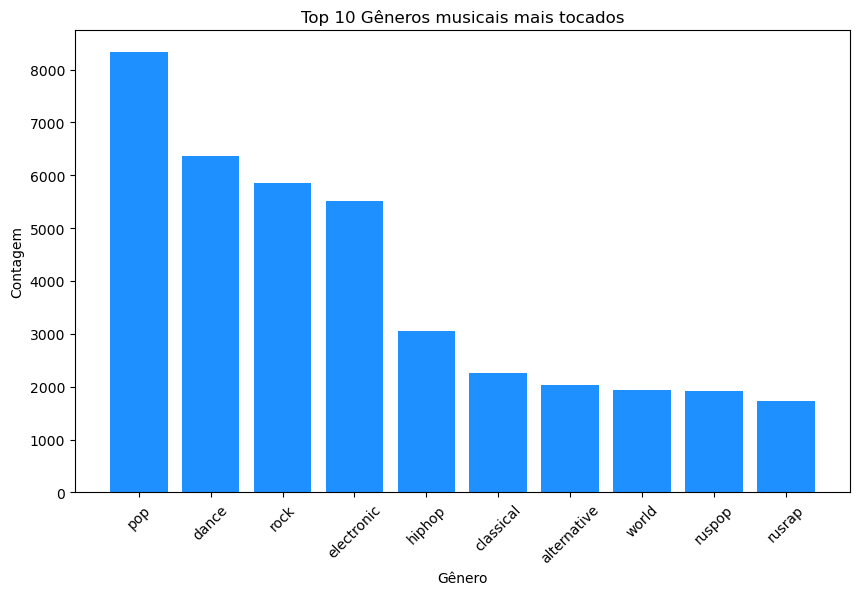

In [55]:
df_sorted = genre_top_10.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['genre'], df_sorted['count'], color='#1E90FF')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Top 10 Gêneros musicais mais tocados')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">Como podemos notar no gráfico acima, os gêneros mais ouvidos nas duas cidades são respectivamente: ``pop``, ``dance`` e ``rock``.</span>

**Agrupando os dados por ``gênero`` e ``cidade``:**


In [ ]:
group_city_genre = df.groupby(['city', 'genre']).size().reset_index(name='count')
genre_by_city_sorted = group_city_genre.sort_values(by=['city', 'count'], ascending=[True, False])
top_10_genres_by_city = genre_by_city_sorted.groupby('city').head(10)
top_10_genres_by_city

,city,genre,count
138,Shelbyville,pop,2431
41,Shelbyville,dance,1932
159,Shelbyville,rock,1879
56,Shelbyville,electronic,1736
90,Shelbyville,hiphop,960
3,Shelbyville,alternative,649
33,Shelbyville,classical,646
163,Shelbyville,rusrap,564
162,Shelbyville,ruspop,538
200,Shelbyville,world,515


**Plotando gráfico de ``barras``:**


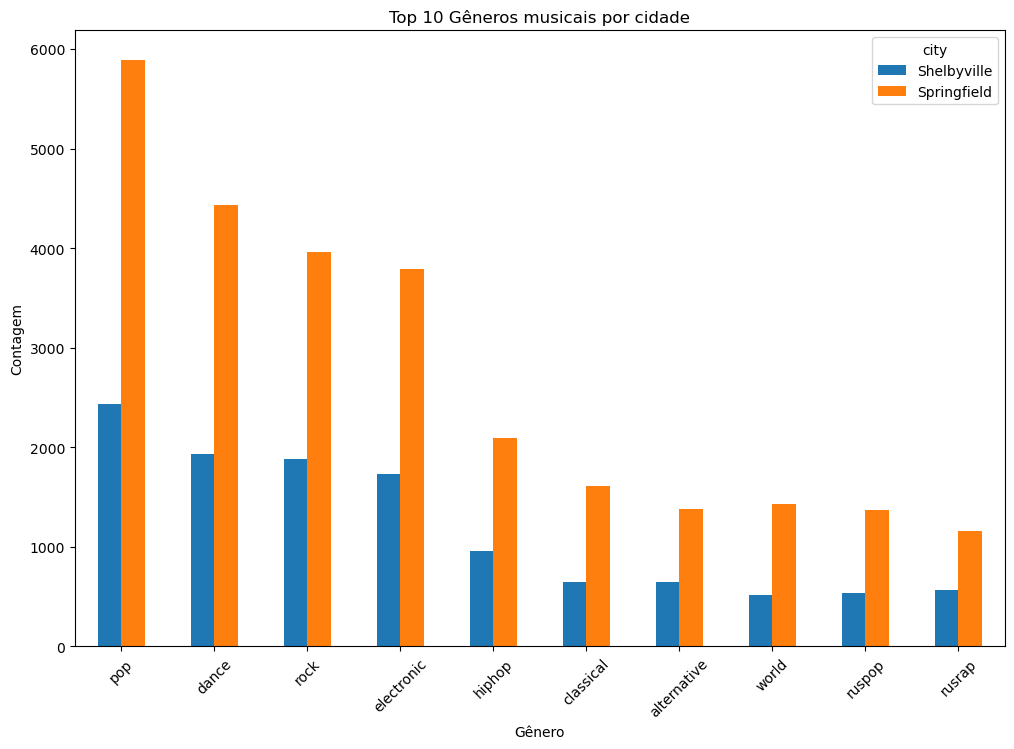

In [54]:
pivot_df = top_10_genres_by_city.pivot(index='genre', columns='city', values='count')
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Top 10 Gêneros musicais por cidade')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">Agora seperandos os gêneros por cidade, notamos que segue o mesmo padrão da preferência dos usuários pelo gênero e nota-se também que os usuários de ``Springfield`` escutam mais que o dobro de músicas em relação aos usuários de ``Shelbyville``.</span>

**Contando a quantidade de cada ``Música`` mais escutada pelos usuários:**


In [17]:
track_top_10 = df['track'].value_counts().head(10).reset_index()
track_top_10.columns = ['track', 'count']
track_top_10

,track,count
0,unknown,1262
1,Brand,127
2,So Long,110
3,Going Back,90
4,Moscow Calling,87
5,All for You,80
6,Balenciaga,74
7,Bam Bag «Gucci»,70
8,Perte de temps,69
9,5 Min,69


<span style="color:green;">Podemos notar na tabela acima que a maioria é ``unknown`` que foi o dado que preenchemos na análise para os dados faltantes e, sabendo disso, iremos retirar este dado para construção do gráfico abaixo.</span>

**Plotando gráfico de ``barras``:**


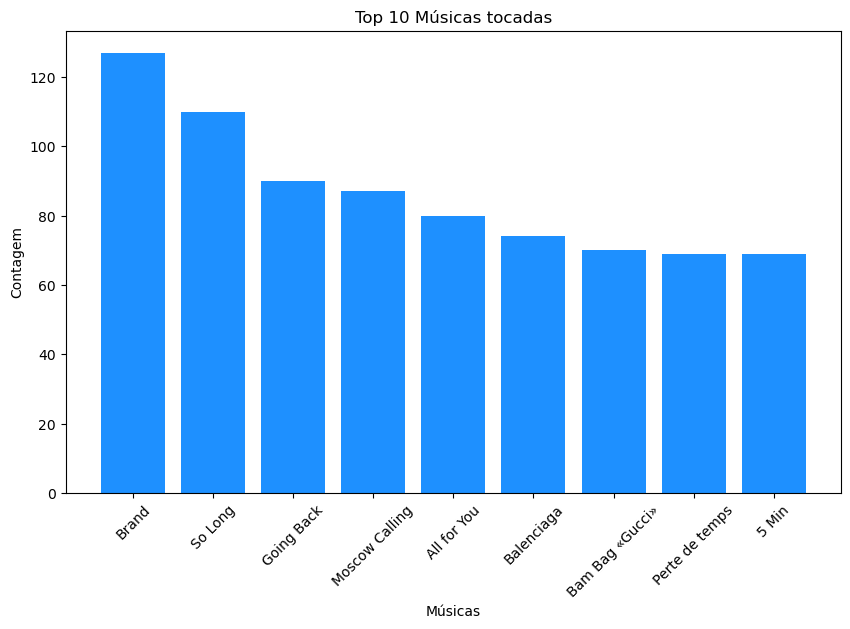

In [48]:
df_filtered = track_top_10[track_top_10['track'] != 'unknown']
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['track'], df_filtered['count'], color='#1E90FF')
plt.xlabel('Músicas')
plt.ylabel('Contagem')
plt.title('Top 10 Músicas tocadas')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">Como podemos notar no gráfico acima, as músicas mais ouvidas nas duas cidades são respectivamente: ``Brand``, ``So Long`` e ``Going Back``.</span>

**Contando a quantidade de cada ``Artistas`` mais escutados pelos usuários:**


In [19]:
artist_top_10 = df['artist'].value_counts().head(10).reset_index()
artist_top_10.columns = ['artist', 'count']
artist_top_10

,artist,count
0,unknown,7097
1,Kartvelli,127
2,MALFA,109
3,Real Bodrit,90
4,The Seasons,79
5,Irina Shok,70
6,KoperniK,69
7,RELFY,69
8,Dr. Living Dead!,68
9,Argishty (Duduk),62


<span style="color:green;">Podemos notar na tabela acima que a maioria é ``unknown`` que foi o dado que preenchemos na análise para os dados faltantes e, sabendo disso, iremos retirar este dado para construção do gráfico abaixo.</span>

**Plotando gráfico de ``barras``:**


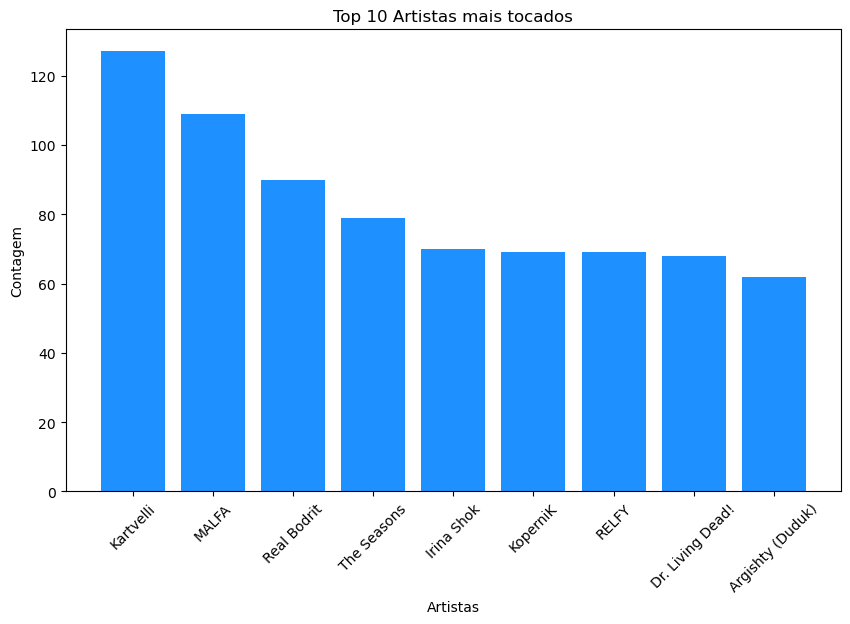

In [46]:
df_filtered_2 = artist_top_10[artist_top_10['artist'] != 'unknown']
plt.figure(figsize=(10, 6))
plt.bar(df_filtered_2['artist'], df_filtered_2['count'], color='#1E90FF')
plt.xlabel('Artistas')
plt.ylabel('Contagem')
plt.title('Top 10 Artistas mais tocados')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">Como podemos notar no gráfico acima, os artistas mais ouvidos nas duas cidades são respectivamente: ``Kartvelli``, ``MALFA`` e ``Real Bodrit``.</span>

In [51]:
group_user = df.groupby('user_id').agg({'track' : 'count'}).reset_index().sort_values(by='track', ascending=False).head(10)
group_user

,user_id,track
26594,A8AE9169,71
18839,7D166C63,51
8548,414F229D,50
37586,E8339398,43
38754,EED05948,36
34594,D6A03F1E,36
28798,B5496034,34
29340,B851E1A5,33
8026,3E4BFAA7,31
7274,39EDC574,30


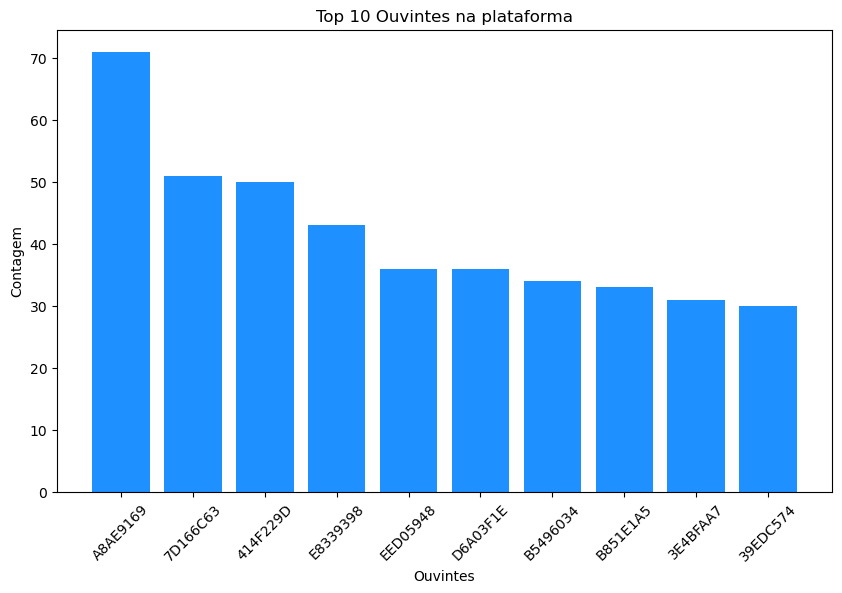

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(group_user['user_id'], group_user['track'], color='#1E90FF')
plt.xlabel('Ouvintes')
plt.ylabel('Contagem')
plt.title('Top 10 Ouvintes na plataforma')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">Podemos obvservar no gráfico acima que, o ouvinte ``A8AE9169`` destaca-se como ouvinte na plataforma, com ``71 plays``.</span>

## Etapa 3. Teste de Hipótese

In [21]:
df.head()

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday


**Agrupando dados por cidade:**

In [22]:
group_city = df.groupby(by='city')['track'].count().reset_index()
group_city

,city,track
0,Shelbyville,18512
1,Springfield,42741


<span style="color:green;">Pode-se notar que os moradores de Springfield ouvem mais que o dobro de músicas que a cidade de Shelbyville durante a semana.</span>

**Agrupando dados por dia da semana:**


In [23]:
group_day = df.groupby(by='day')['track'].count().reset_index()
group_day

,day,track
0,Friday,21840
1,Monday,21354
2,Wednesday,18059


<span style="color:green;">Pode-se notar há um equilíbrio entre os dias da semana em que as músicas são executadas nas duas cidades.</span>

**Executando uma função com
Parâmetros: ``day`` e ``city``
e Filtragem consecutiva com ``indexação lógica``:**


In [24]:
def number_tracks(df, day, city):

    df_filtered = df[(df['day'] == day) & (df['city'] == city)]
    count_tracks = df_filtered['user_id'].count()
    return count_tracks

**Chamando a função `Segunda-feira` na cidade de ``Springfield``:**

In [25]:
number_tracks(df, 'Monday', 'Springfield')

15740

**Chamando a função `Segunda-feira` na cidade de ``Shelbyville``:**

In [26]:
number_tracks(df, 'Monday', 'Shelbyville')

5614

**Chamando a função `Quarta-feira` na cidade de ``Springfield``:**

In [27]:
number_tracks(df, 'Wednesday', 'Springfield')

11056

**Chamando a função `Quarta-feira` na cidade de ``Shelbyville``:**

In [28]:
number_tracks(df, 'Wednesday', 'Shelbyville')

7003

**Chamando a função `Sexta-feira` na cidade de ``Springfield``:**

In [29]:
number_tracks(df, 'Friday', 'Springfield')

15945

**Chamando a função `Sexta-feira` na cidade de ``Shelbyville``:**

In [30]:
number_tracks(df, 'Friday', 'Shelbyville')

5895

**``Hipótese``: A atividade dos usuários é diferente dependendo do dia da semana e da cidade.**

<span style="color:green;">Se compararmos o compartamento dos ouvintes nas cidades, nota-se que os ouvintes de ``Springfield`` ouvem mais músicas durante toda a semana em comparação com a cidade de ``Shelbyville``. Sendo assim, a hipóstese está confirmada.</span>

# Conclusões <a id='end'></a>

Como podemos notar, a hipótese foi totalmente aceita, uma vez que analisando os dados aprensentados, as duas cidades diferem bruscamente em termos de números de ouvintes nos mesmos dias da semana. Nota-se que a cidade de ``Springfield`` em todos os dias da semana possui mais ouvintes que a cidade de ``Shelbyville``.